In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
ipl = pd.read_csv("data/Auction Data.csv") #import dataset

In [13]:
# ipl.to_excel("data1.xlsx") # load data to excel sheet to observe manually

# Data Columns Description:                           

**List Sr.No.** - Serial number of the player in the auction list.                              
**Set No.** - Grouping of players into sets for auction purposes.(Numerical)                             
**2025 Set** - Specific set identifier for 2025 auction. (categorical)                                       
**First Name** - Player's first name.(object)                                 
**
Surnam**e - Player's last name(object)                                                                           
**
Countr**y - Nationality of the player(categorical)                                            
**State Association** - State or regional cricket association.(categorical)                                                
**DOB** - Date of Birth of the player.(DateTime)                                               
**Age** - Player’s age as of 2025.(Numerical)                                           
**Specialism** - Player’s role (e.g., Batter, Bowler, All-Rounder, Wicketkeeper).(Categorical)                                       
**Test Caps** - Number of Test matches played by the player.(Numerical)                                                         
**ODI Caps** - Number of One Day International matches played.(Numerical)                                                                     
**T20 Caps** - Number of T20 International matches played.(Numerical)                                                        
**IPL** - Number of IPL matches played by the player.(Numerical)                                                         
**Previous IPL Team(s)** - List of IPL teams the player has been associated with.(object)                                               
**2024 Team** - Player's team during the 2024 IPL season.(categorical)                                                                  
**2024 IPL** - Performance metrics or appearances in the 2024 season.(categorical)                               
**C/U/A** - Capped/Uncapped/Associate player status.(object)                                                         
**Reserve Price Rs Lakh** - Base price for the auction, in Indian Rupees (Lakh).(Numerical)                                           

..

# observation  

**dirty data**
- in rows between 71-77,144-150,217-223,290-296,363-369,436-442,509-515,582-588,635 in index repeated
- there are two columns name is not given 

**messy data**
- columns are not properly arrange
- last coulmns has data suffeld

**Data Cleaning**

In [17]:
ipl.drop([0,1],inplace=True) # we drop row 0 , 1 because it useless

In [18]:
newheader = ipl.loc[2].values # we give all values of row 2 to newheader

In [19]:
ipl.columns = newheader # we give all values of row to columns to make new column names
ipl.drop(2,inplace=True) # then i drop row 2 because it is useless

In [20]:
a = list(ipl.columns) # making ipl columns values in list to edit 
a[6]= "State Association"
a[10]= "batting_styles"
a[11]="bowling_styles"
a[17] = "2024 Team"
a[18] = "2024 IPL"
a[20] = "Reserve Price Rs Lakh"
ipl.columns = a # we all columns name as per columns

In [21]:
ipl.drop([3,4,71,72,73,74,75,76,77,144,145,146,147,148,149,150,217,218,219,220,221,222,223,290,291,292,293,294,295,296,221,222,223,363,364,365,366,367,368,369,436,437,438,439,440,441,442,509,510,511,512,513,514,515,582,583,584,585,586,587,588,635],inplace=True)

In [22]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574 entries, 5 to 634
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   List Sr.No.            574 non-null    object
 1   Set No.                574 non-null    object
 2   2025 Set               574 non-null    object
 3   First Name             574 non-null    object
 4   Surname                574 non-null    object
 5   Country                574 non-null    object
 6   State Association      366 non-null    object
 7   DOB                    574 non-null    object
 8   Age                    574 non-null    object
 9   Specialism             574 non-null    object
 10  batting_styles         574 non-null    object
 11  bowling_styles         497 non-null    object
 12  Test caps              136 non-null    object
 13  ODI caps               207 non-null    object
 14  T20 caps               219 non-null    object
 15  IPL                    298 n

In [23]:
ipl.isnull().sum()

List Sr.No.                0
Set No.                    0
2025 Set                   0
First Name                 0
Surname                    0
Country                    0
State Association        208
DOB                        0
Age                        0
Specialism                 0
batting_styles             0
bowling_styles            77
Test caps                438
ODI caps                 367
T20 caps                 355
IPL                      276
Previous IPLTeam(s)      277
2024 Team                197
2024 IPL                  42
C/U/A                    178
Reserve Price Rs Lakh    333
dtype: int64

In [24]:
ipl.describe()

,List Sr.No.,Set No.,2025 Set,First Name,Surname,Country,State Association,DOB,Age,Specialism,...,bowling_styles,Test caps,ODI caps,T20 caps,IPL,Previous IPLTeam(s),2024 Team,2024 IPL,C/U/A,Reserve Price Rs Lakh
count,574,574,574,574,574,574,366,574,574,574,...,497,136,207,219,298,297,377,532,396,241
unique,574,78,79,469,446,13,34,550,26,4,...,10,58,88,89,90,137,14,28,10,8
top,1,72,FA3,Akash,Singh,India,DDCA,15/11/1995,26,BOWLER,...,RIGHT ARM Off Spin,1,2,2,0,MI,Uncapped,30,Capped,30
freq,1,13,9,6,26,366,33,3,54,204,...,119,12,15,13,50,20,122,119,146,89


<Axes: xlabel='Country'>

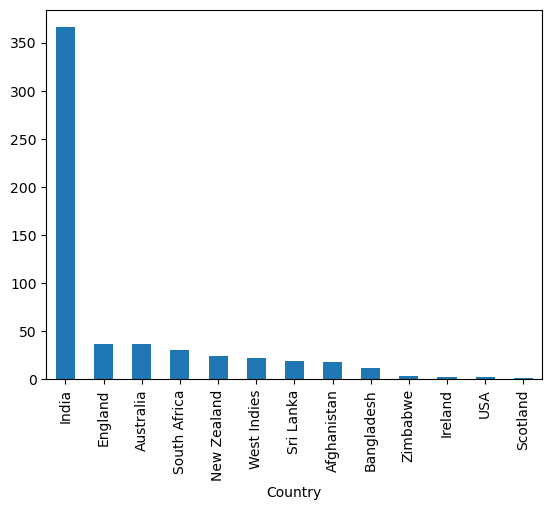

In [47]:
ipl["Country"].value_counts().plot(kind='bar')

<Axes: xlabel='Specialism'>

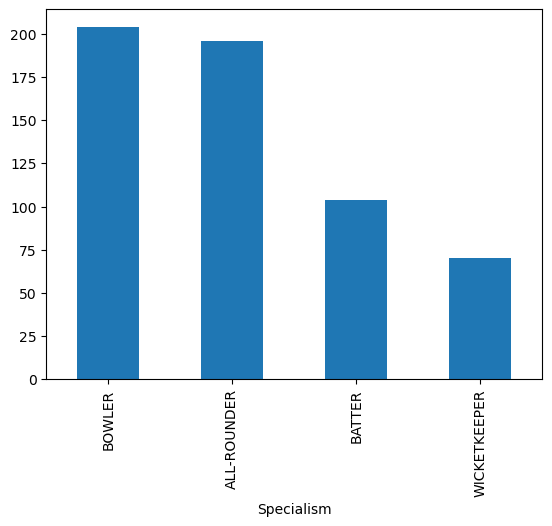

In [55]:
ipl["Specialism"].value_counts().plot(kind="bar")

In [57]:
ipl

,List Sr.No.,Set No.,2025 Set,First Name,Surname,Country,State Association,DOB,Age,Specialism,...,bowling_styles,Test caps,ODI caps,T20 caps,IPL,Previous IPLTeam(s),2024 Team,2024 IPL,C/U/A,Reserve Price Rs Lakh
5,1,1,M1,Jos,Buttler,England,NaN,08/09/1990,34,WICKETKEEPER,...,RIGHT ARM Off Spin,57,181,124,107,"MI,RR",RR,11,Capped,200
6,2,1,M1,Shreyas,Iyer,India,MCA,06/12/1994,30,BATTER,...,RIGHT ARM Off Spin,14,62,51,116,"DC,KKR",KKR,15,Capped,200
7,3,1,M1,Rishabh,Pant,India,DDCA,04/10/1997,27,BATTER,...,RIGHT ARM Off Spin,37,31,76,111,DC,DC,13,Capped,200
8,4,1,M1,Kagiso,Rabada,South Africa,NaN,25/05/1995,29,BOWLER,...,RIGHT ARM Fast,66,101,65,80,"DC,PBKS",PBKS,11,Capped,200
9,5,1,M1,Arshdeep,Singh,India,PCA,05/02/1999,26,BOWLER,...,LEFT ARM Fast Medium,NaN,8,56,65,PBKS,PBKS,14,Capped,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,570,79,UAL15,Khrievitso,Kense,India,NCA,06/03/2004,21,ALL-ROUNDER,...,RIGHT ARM Leg Spin,NaN,NaN,NaN,NaN,NaN,Uncapped,30,NaN,NaN
631,571,79,UAL15,Akash,Parkar,India,MCA,20/05/1994,30,ALL-ROUNDER,...,RIGHT ARM Medium,NaN,NaN,NaN,NaN,NaN,Uncapped,30,NaN,NaN
632,572,79,UAL15,Vignesh,Puthur,India,KCA,02/03/2001,24,ALL-ROUNDER,...,LEFT ARM Slow Unorthodox,NaN,NaN,NaN,NaN,NaN,Uncapped,30,NaN,NaN
633,573,79,UAL15,Tripuresh,Singh,India,MPCA,13/04/2002,22,ALL-ROUNDER,...,RIGHT ARM Medium,NaN,NaN,NaN,NaN,NaN,Uncapped,30,NaN,NaN
